# Overview: Models and Priors

This notebook provides a high-level overview of the various features available in `brutus`, focusing on the models and priors. More detailed information can be found in the documentation and in other notebooks. Files needed to run various parts of the code can also be found online.

# Preamble

In [1]:
from __future__ import print_function, division
from six.moves import range
import sys
import numpy as np
import scipy
import matplotlib
from matplotlib import pyplot as plt
import h5py

In [2]:
# plot in-line within the notebook
%matplotlib inline

# re-defining plotting defaults
from matplotlib import rcParams
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'axes.titlepad': '15.0'})
rcParams.update({'axes.labelpad': '15.0'})
rcParams.update({'font.size': 30})

# brutus

As with many other python packages, `brutus` can be imported by just using the following import command.

In [3]:
import brutus

# Models

`brutus` is designed to be modular, with various aspects of the code designed to handle different parts of the stellar modeling process. One portion is the ability to generate **stellar model parameters** and their associated **Spectral Energy Distributions (SEDs)**. These can be directly accessed through the `seds` module.

In [4]:
from brutus import seds

SEDs can only be generated in a pre-defined set of filters. These can be access through the `filters` module and pass on to other functions.

In [5]:
from brutus import filters

# all filters
print('All bands:', filters.FILTERS,'\n')

# just Pan-STARRS and 2MASS
filt = filters.ps[:-2] + filters.tmass
print('Current subset:', filt)

All bands: ['Gaia_G_MAW', 'Gaia_BP_MAWf', 'Gaia_RP_MAW', 'SDSS_u', 'SDSS_g', 'SDSS_r', 'SDSS_i', 'SDSS_z', 'PS_g', 'PS_r', 'PS_i', 'PS_z', 'PS_y', 'PS_w', 'PS_open', 'DECam_u', 'DECam_g', 'DECam_r', 'DECam_i', 'DECam_z', 'DECam_Y', 'Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'VISTA_Z', 'VISTA_Y', 'VISTA_J', 'VISTA_H', 'VISTA_Ks', 'UKIDSS_Z', 'UKIDSS_Y', 'UKIDSS_J', 'UKIDSS_H', 'UKIDSS_K', 'WISE_W1', 'WISE_W2', 'WISE_W3', 'WISE_W4', 'Tycho_B', 'Tycho_V', 'Hipparcos_Hp', 'Kepler_D51', 'Kepler_Kp', 'TESS'] 

Current subset: ['PS_g', 'PS_r', 'PS_i', 'PS_z', 'PS_y', '2MASS_J', '2MASS_H', '2MASS_Ks']


## Isochrones

SEDs come in two flavors in `brutus`. The first are **isochrones**, which involves a co-eval stellar population (i.e. a stars at fixed age). These can be accessed through the `Isochrone` class. Note that the relevant files, which include a **neural network** (NN) trained to generate photometry as well as an isochrone grid, are available online.

In [6]:
nnfile = '../data/DATAFILES/nn_c3k.h5'
mist_iso = '../data/DATAFILES/MIST_1.2_iso_vvcrit0.0.h5'

isochrone = seds.Isochrone(filters=filt, nnfile=nnfile, mistfile=mist_iso)

Filters: ['PS_g', 'PS_r', 'PS_i', 'PS_z', 'PS_y', '2MASS_J', '2MASS_H', '2MASS_Ks']
Constructing MIST isochrones...done!
Initializing FastNN predictor...done!


Isochrones can vary as a function of **metallicity** ${\rm [Fe/H]}$, **age** $\log t_{\rm age}$ (in years), **extinction** $A(V)$ (in mag), **differential extinction** $R(V)$ (unitless), **secondary mass fraction** $q$ (for binaries with $q=0$ being a single star and $q=1$ being an equal-mass binary), and **distance** $d$ (in kpc). They are evaluated over a grid of **equivalent evolutionary points (EEPs)**, which can also be passed during runtime.

In [7]:
eep_grid = np.linspace(202, 808, 5000)

# generate isochrone
mags, params_prim, params_sec = isochrone.get_seds(feh=0., loga=8.5, 
                                                   av=0., rv=3.3, 
                                                   smf=0., dist=10.,
                                                   eep=eep_grid)

The outputs here are SEDS (in mags), parameters of the primary, and parameters of the secondary (which default to `nan` if the secondary doesn't exist). The parameters include the **initial mass** (in solar masses), **current mass** (in solar masses), **bolometric luminosity** (in solar luminosities), **effective temperature** (in K), **effective radius** (in solar radii), **surface gravity** (in cgs), **surface metallicity** (in solar units), and **surface alpha-element abundance** (in solar units). We visualize this below.

In [8]:
params_prim

{'mini': array([0.31402664, 0.31410428, 0.31418191, ..., 3.42797102, 3.42797625,
        3.42798148]),
 'mass': array([0.31402598, 0.31410362, 0.31418125, ..., 3.40762902, 3.40743438,
        3.40723974]),
 'logl': array([-1.87174699, -1.87136725, -1.87098751, ...,  3.66643374,
         3.6680437 ,  3.66965367]),
 'logt': array([3.51298241, 3.51305338, 3.51312434, ..., 3.54643712, 3.54626467,
        3.54609223]),
 'logr': array([-0.52051144, -0.52045411, -0.52039677, ...,  2.26301978,
         2.26416965,  2.26531953]),
 'logg': array([4.92405923, 4.92405737, 4.9240555 , ..., 0.44319837, 0.44087499,
        0.4385516 ]),
 'feh_surf': array([-0.22613424, -0.22944984, -0.23276543, ...,  0.03041563,
         0.03041563,  0.03041562]),
 'afe_surf': array([0., 0., 0., ..., 0., 0., 0.])}

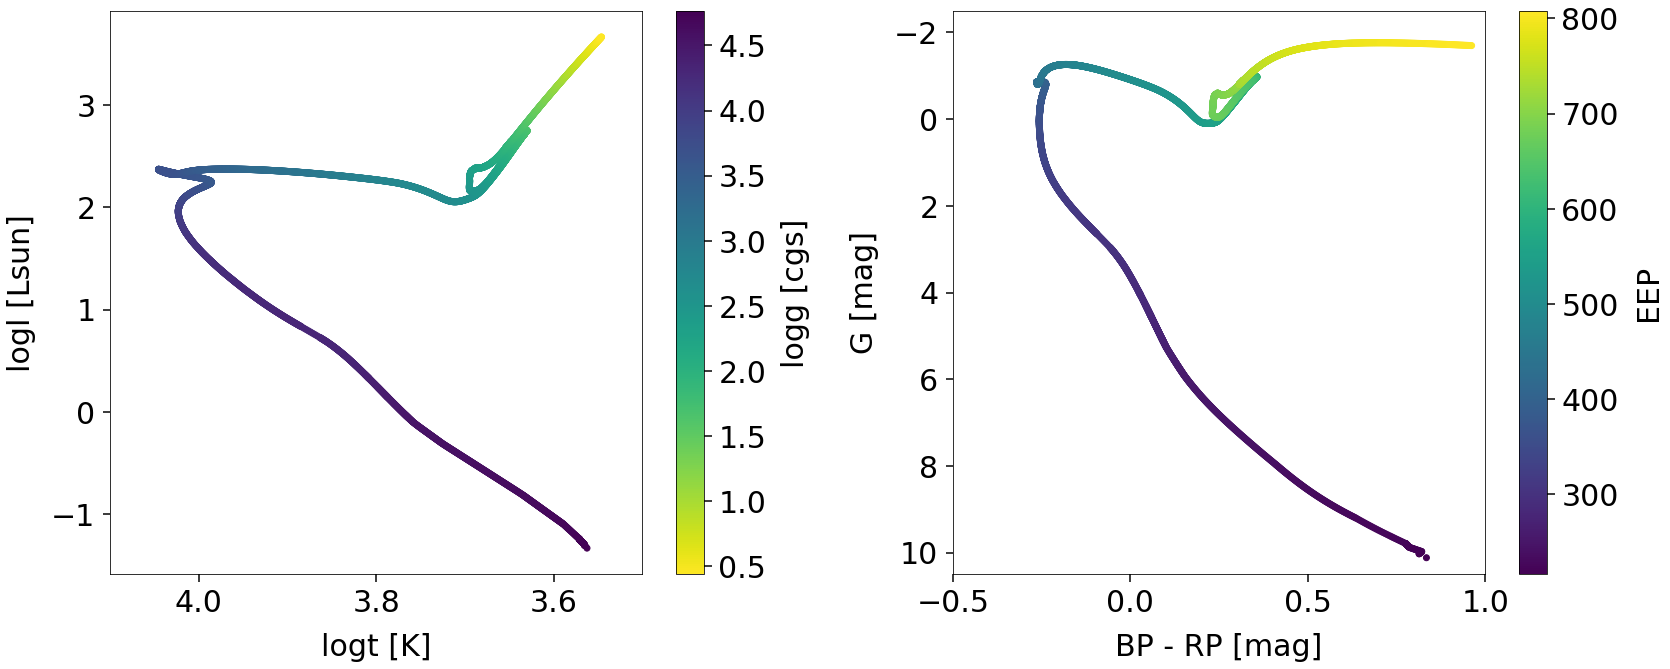

In [9]:
mask = np.all(np.isfinite(mags), axis=1)  # only include objects with valid photometry
logl, logt = params_prim['logl'][mask], params_prim['logt'][mask]
logg = params_prim['logg'][mask]
G, BP, RP = mags[mask, :3].T

# plot isochrone
plt.figure(figsize=(24, 10))
# HRD
plt.subplot(1, 2, 1)
plt.scatter(logt, logl, c=logg, cmap='viridis_r')
plt.xlabel('logt [K]')
plt.ylabel('logl [Lsun]')
plt.xlim([4.1, 3.5])
plt.colorbar(label='logg [cgs]')
# CMD
plt.subplot(1, 2, 2)
plt.scatter(BP - RP, G, c=eep_grid[mask])
plt.xlabel('BP - RP [mag]')
plt.ylabel('G [mag]')
plt.xlim([-0.5, 1.])
plt.ylim([10.5, -2.5])
plt.colorbar(label='EEP')
plt.tight_layout()

The ability to support unresolved binaries is demonstrated below. Note that this assumes decoupled stellar evolution and disallows binaries above the MS, so it's entirely an observational effect.

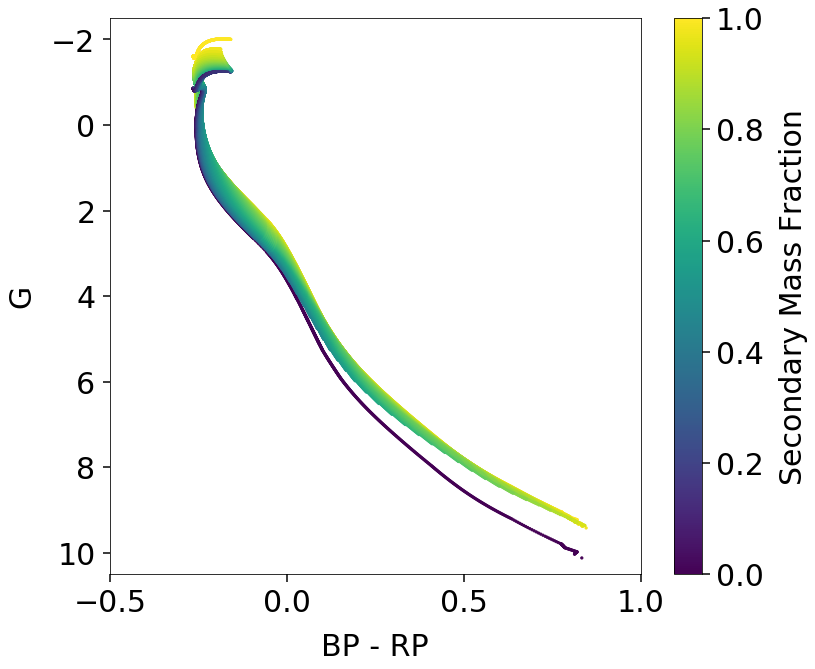

In [10]:
# generate binary isochrones
smfgrid = np.linspace(0., 1., 51)
mags_arr = []
eep_grid = np.linspace(202, 808, 5000)
eeps = []
for smf in smfgrid:
    mags, params_prim, params_sec = isochrone.get_seds(feh=0., loga=8.5, 
                                                       av=0., rv=3.3,
                                                       smf=smf, dist=10.,
                                                       eep=eep_grid)
    mags_arr.append(mags)
    eeps.append(eep_grid)
mags_arr, eeps = np.array(mags_arr), np.array(eeps)
G, BP, RP = mags_arr[:, :, :3].T

# plot results
plt.figure(figsize=(12, 10))
plt.scatter((BP - RP)[eeps.T < 480].flatten(), G[eeps.T < 480].flatten(), 
            c=np.tile(smfgrid, len(eep_grid))[eeps.T.flatten() < 480],
            s=5)  # only include EEP < 480 to avoid overplotting evolved objects
plt.xlabel('BP - RP')
plt.ylabel('G')
plt.xlim([-0.5, 1.])
plt.ylim([10.5, -2.5])
plt.colorbar(label='Secondary Mass Fraction')
plt.tight_layout()

Since binaries can only exist when secondary companions have stellar masses that are defined in the models, there are regions of parameter space where the models (by default) can't create binaries, and so those regions are not properly filled in.

An example using these isochrones to model clusters is shown in a separate demo.

## EEP Tracks

The second flavor of model generation are **EEP tracks**, which involves tracking the evolution of a particular star over its lifetime (i.e. over EEP). These can be accessed through the `SEDmaker` class. As with the isochrone files, the mass tracks that serve as input are available online.

In [11]:
mist_eeptrk = '../data/DATAFILES/MIST_1.2_EEPtrk.h5'

sedmaker = seds.SEDmaker(filters=filt, nnfile=nnfile, mistfile=mist_eeptrk)

Filters: ['PS_g', 'PS_r', 'PS_i', 'PS_z', 'PS_y', '2MASS_J', '2MASS_H', '2MASS_Ks']
Constructing MIST library...done!
Computing age weights for track (mini, feh, afe) = (300.0, 0.5, 0.0)            
Initializing FastNN predictor...done!


As with the isochrones, mass tracks support variation in all the same parameters in addition to variation in initial mass. These are visualized below.

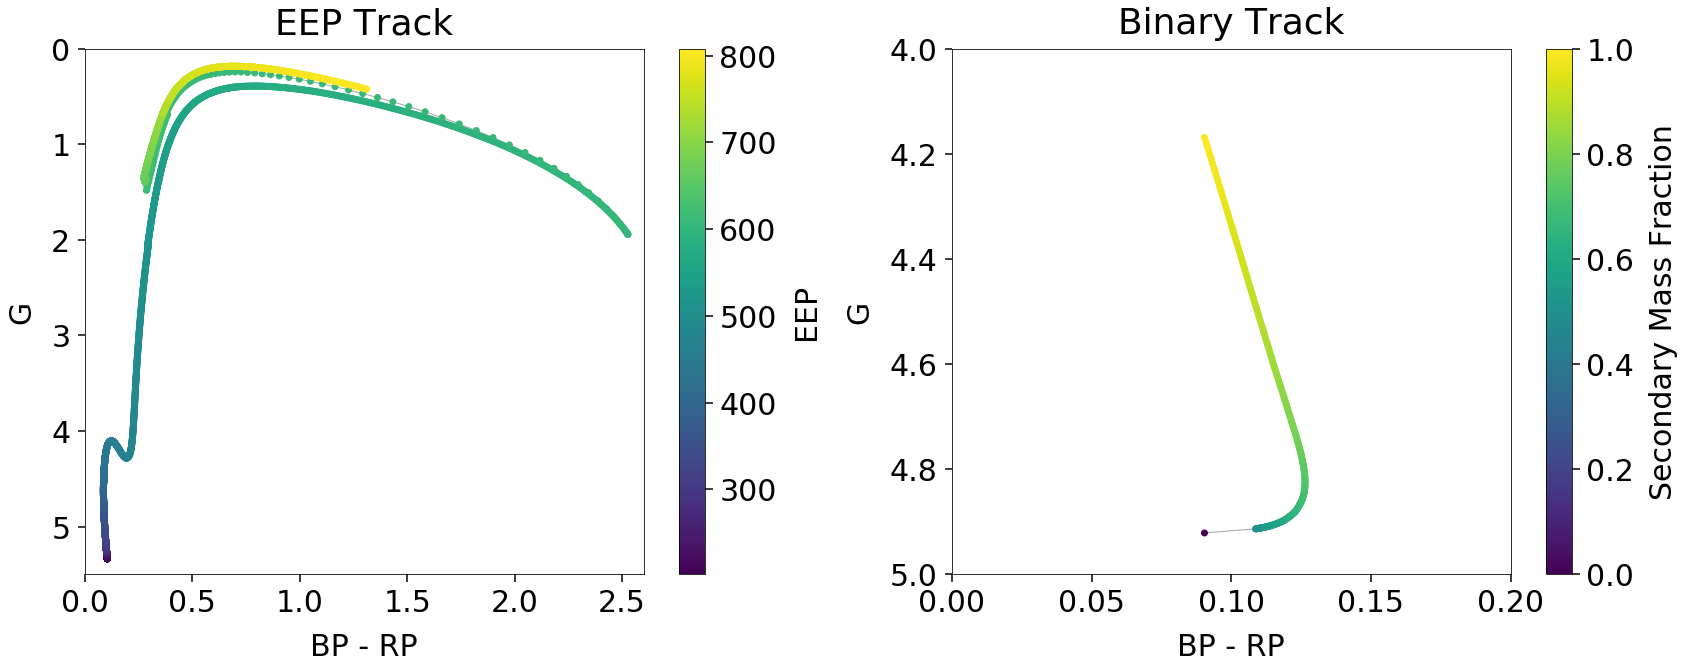

In [12]:
plt.figure(figsize=(24, 10))

# get EEP track for sun-like star
eep_grid = np.linspace(202, 808, 5000)
G, BP, RP = np.zeros((3, len(eep_grid)))
for i, eep in enumerate(eep_grid):
    mags, params_prim, params_sec = sedmaker.get_sed(mini=1., feh=0.,
                                                     eep=eep, smf=0.,
                                                     av=0., rv=3.3,  
                                                     dist=10.)
    G[i], BP[i], RP[i] = mags[:3]

# plot results
plt.subplot(1, 2, 1)
plt.scatter(BP - RP, G, c=eep_grid, zorder=2)
plt.plot(BP - RP, G, color='gray', lw=1, alpha=0.7, zorder=1)
plt.xlabel('BP - RP')
plt.ylabel('G')
plt.xlim([0., 2.6])
plt.ylim([5.5, 0.])
plt.colorbar(label='EEP')
plt.title('EEP Track')
plt.tight_layout()

# show binary track
smf_grid = np.linspace(0., 1., 500)
G, BP, RP = np.zeros((3, len(smf_grid)))
for i, smf in enumerate(smf_grid):
    mags, params_prim, params_sec = sedmaker.get_sed(mini=1., feh=0., 
                                                     eep=350., smf=smf,
                                                     av=0., rv=3.3,
                                                     dist=10.)
    G[i], BP[i], RP[i] = mags[:3]
    
# plot results
plt.subplot(1, 2, 2)
plt.scatter(BP - RP, G, c=smf_grid, zorder=2)
plt.plot((BP - RP)[np.isfinite(G)], G[np.isfinite(G)], 
         color='gray', lw=1, alpha=0.7, zorder=1)
plt.xlabel('BP - RP')
plt.ylabel('G')
plt.xlim([0., 0.2])
plt.ylim([5., 4.])
plt.colorbar(label='Secondary Mass Fraction')
plt.title('Binary Track')
plt.tight_layout()

Gaps in these plots are due to unequal coverage in EEP space (left) and ill-defined binaries (right).

In general, you should be using `SEDmaker` to generate data to individual objects and `Isochrone` to generate data to a larger population of co-eval sources. Examples of how to model individual objects and stars in clusters using these SED generation utilities are shown in separate notebooks.

## Empirical Corrections

By default, `brutus` applies a set of **empirical corrections** to the SEDs generated from these classes. These were initially calibrated using a handful of open clusters as described in the initial release paper. These can be disabled by setting `apply_corr=False` or by adjusting `corr_params`.

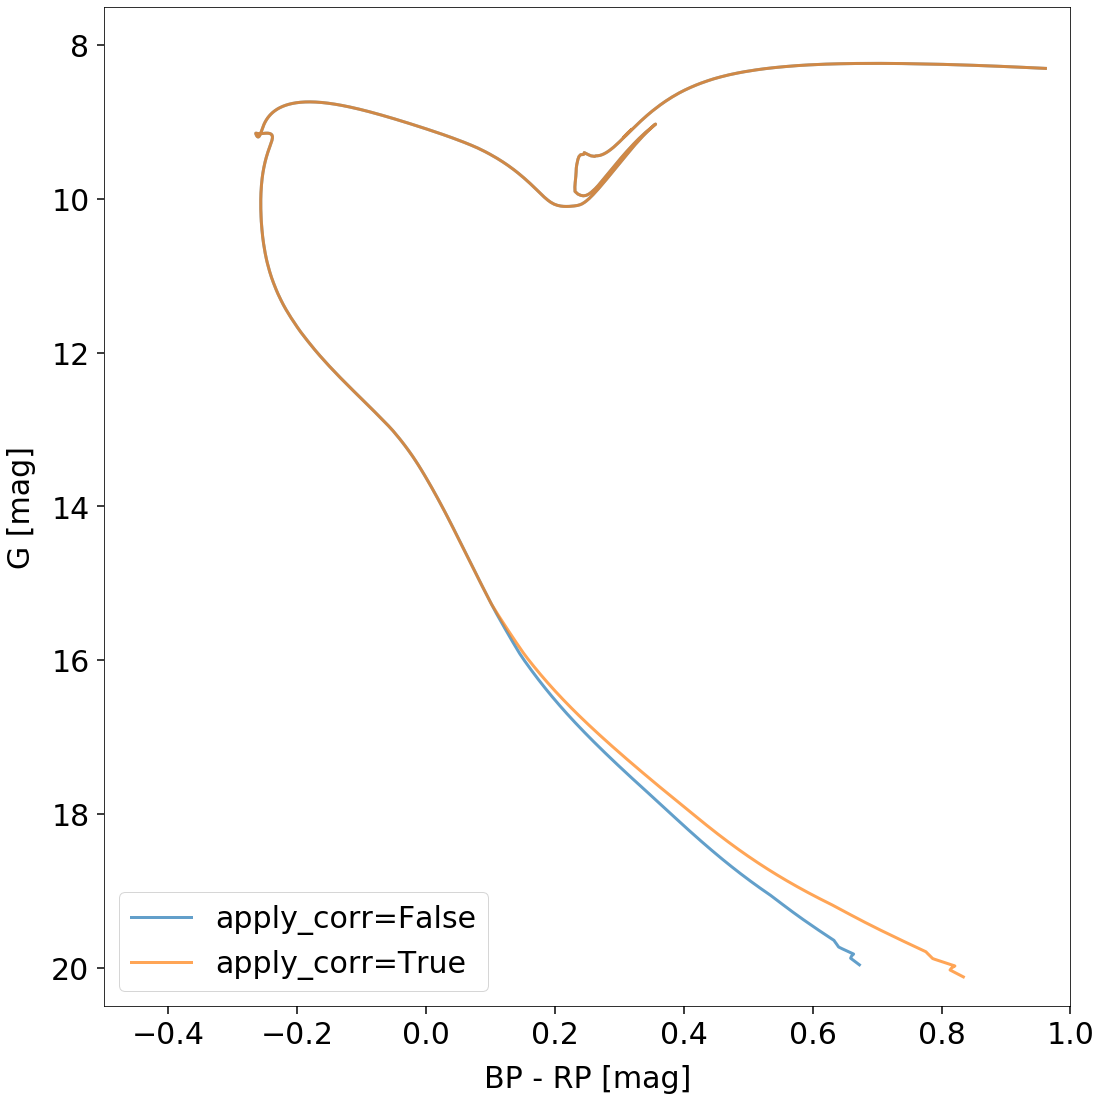

In [13]:
plt.figure(figsize=(16, 16))
for apply_corr in [False, True]:
    mags, params_prim, params_sec = isochrone.get_seds(eep=eep_grid,
                                                       apply_corr=apply_corr)
    G, BP, RP = mags[:, :3].T
    plt.plot(BP - RP, G, lw=3, alpha=0.7, label='apply_corr={}'.format(apply_corr))
plt.xlabel('BP - RP [mag]')
plt.ylabel('G [mag]')
plt.xlim([-0.5, 1.])
plt.ylim([20.5, 7.5])
plt.legend()
plt.tight_layout()

# Model Grids

In addition to the model generation utilities derived above, `brutus` also is designed to work with large **model grids**. These are defined in data files available online and can be read in using the `load_models` function in the `utils` module. Note that they are defined relative to $d=1\,{\rm kpc}$.

In [14]:
from brutus import utils as butils

These model grids currently come in two flavors. The first are a simple set of "empirical" models known as the "Bayestar" models, which are defined over a grid of $M_r$ (Pan-STARRS absolute $r$-band magnitude) and ${\rm [Fe/H]}$.

In [15]:
# import Bayestar models
(models_bs, labels_bs, 
 lmask_bs) = butils.load_models('../data/DATAFILES/grid_bayestar_v5.h5', 
                                filters=filt)
Nmodels_bs, _, _ = models_bs.shape

print('Number of Bayestar models:', Nmodels_bs)

Reading filter 2MASS_Ks           

Number of Bayestar models: 40896


The second is a much larger set of theoretical models based on the MIST isochrones showcased above. For flexibility, `load_models` also allows users to specify particular portions of the grid to load in.

In [16]:
# import MIST models
(models_mist, labels_mist,
 lmask_mist) = butils.load_models('../data/DATAFILES/grid_mist_v9.h5', 
                                  filters=filt, include_ms=True, 
                                  include_postms=True)
Nmodels_mist, _, _ = models_mist.shape

print('Number of MIST models:', Nmodels_mist)

Reading filter 2MASS_Ks           


Number of MIST models: 613530


A comparison between the two models is shown below for reference.

In [18]:
# define limits
xlims = np.array([-1., 4.])
ylims = np.array([20., 1.])
xlabel = 'r - z'
ylabel = 'i'
cidx, midx = [1, 3], 2

# get MIST mags/colors
g_mist, r_mist, i_mist, z_mist, y_mist = models_mist[:, :5, 0].T
color_mist = models_mist[:, cidx[0], 0] - models_mist[:, cidx[1], 0]
mag_mist = models_mist[:, midx, 0]
inbounds_mist = ((color_mist > xlims[0]) & (color_mist < xlims[1]) &
                 (mag_mist < ylims[0]) & (mag_mist > ylims[1]))

# get Bayestar mags/colors
color_bs = models_bs[:, cidx[0], 0] - models_bs[:, cidx[1], 0]
mag_bs = models_bs[:, midx, 0]
inbounds_bs = ((color_bs > xlims[0]) & (color_bs < xlims[1]) &
               (mag_bs < ylims[0]) & (mag_bs > ylims[1]))

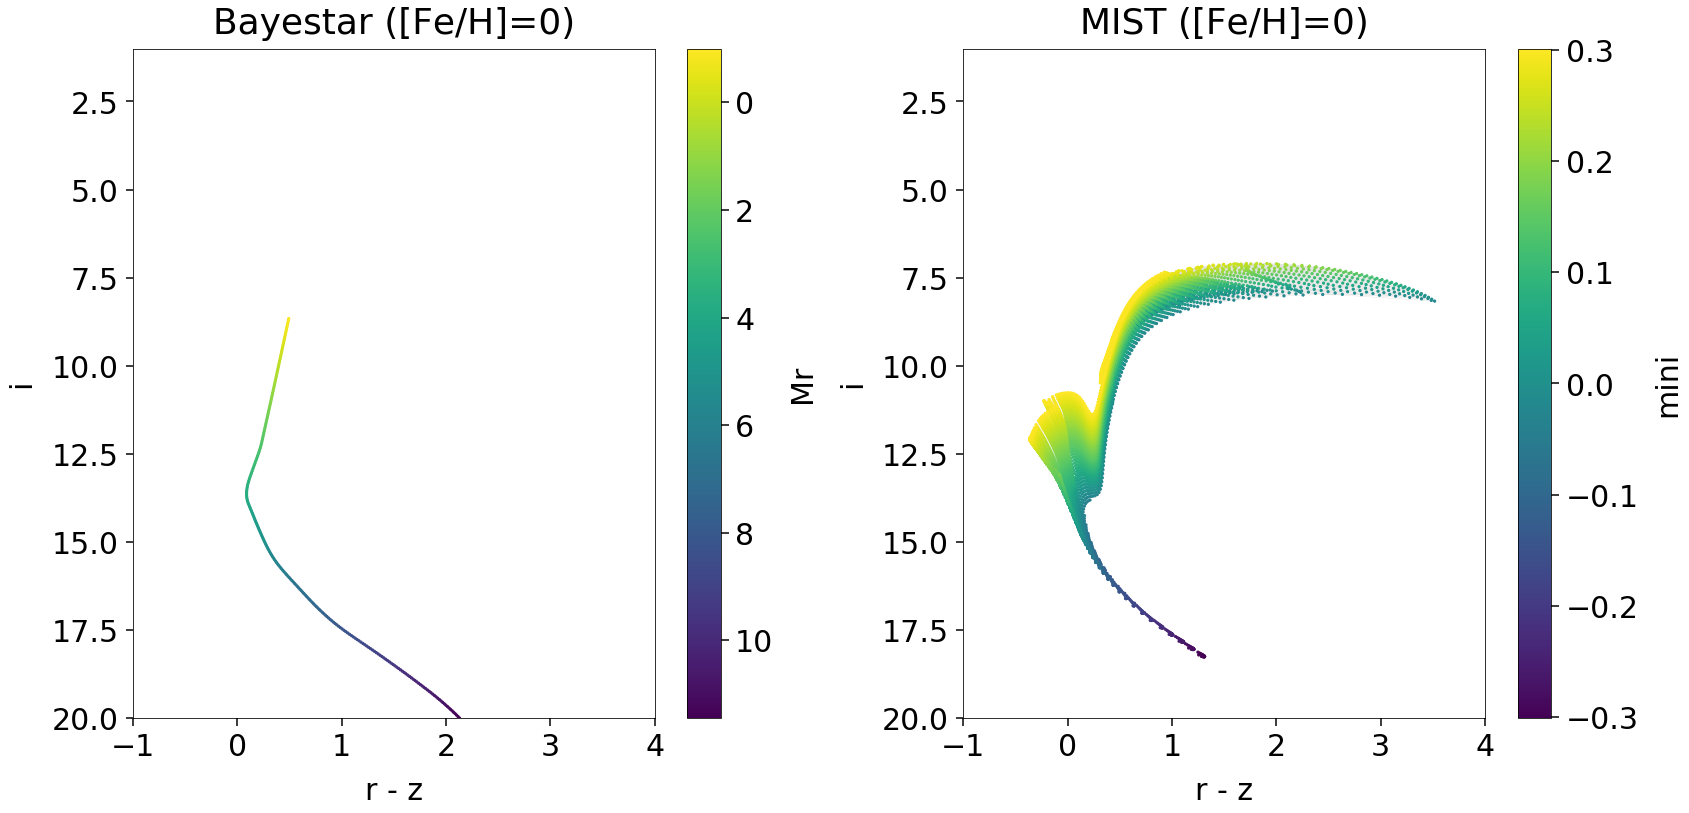

In [19]:
# plot comparison at fixed metallicity
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
sel = (np.isclose(labels_bs['feh'], 0.) & inbounds_bs)
plt.scatter(color_bs[sel], mag_bs[sel], 
            c=labels_bs['Mr'][sel], cmap='viridis_r', s=5)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xlim(xlims)
plt.ylim(ylims)
cbar = plt.colorbar(label='Mr')
cbar.ax.invert_yaxis()
plt.title('Bayestar ([Fe/H]=0)')
plt.tight_layout()
plt.subplot(1, 2, 2)
sel = (np.isclose(labels_mist['feh'], 0) & 
       inbounds_mist)
for m in np.unique(labels_mist['mini']):
    s = labels_mist['mini'] == m
    plt.plot(color_mist[sel & s], mag_mist[sel & s], 
             lw=0.5, color='gray', alpha=0.2, zorder=1)
plt.scatter(color_mist[sel], mag_mist[sel], zorder=2,
            c=np.log10(labels_mist['mini'][sel]), cmap='viridis', s=5)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xlim(xlims)
plt.ylim(ylims)
plt.colorbar(label='mini')
plt.title('MIST ([Fe/H]=0)')
plt.tight_layout()

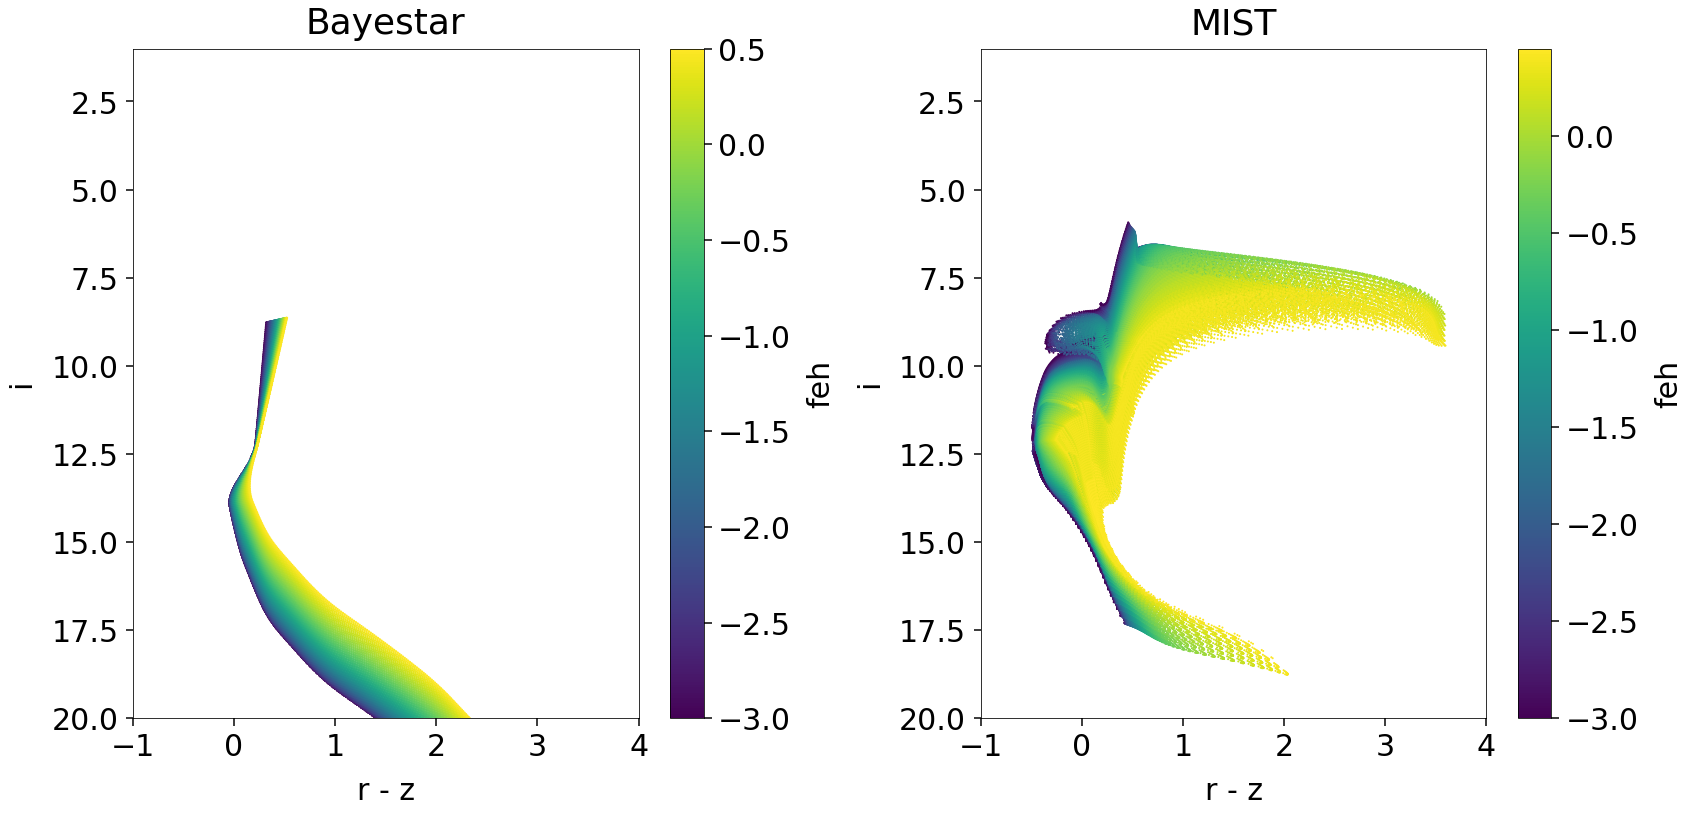

In [20]:
# plot CMDs
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
plt.scatter(color_bs, mag_bs, c=labels_bs['feh'], s=2)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xlim(xlims)
plt.ylim(ylims)
plt.colorbar(label='feh')
plt.title('Bayestar')
plt.tight_layout()
plt.subplot(1, 2, 2)
plt.scatter(color_mist, mag_mist, c=labels_mist['feh'], s=1)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xlim(xlims)
plt.ylim(ylims)
plt.colorbar(label='feh')
plt.title('MIST')
plt.tight_layout()

It is apparent that the Bayestar models are defined down to lower masses for dwarfs but have very limited support on the giant branch. By contrast, while the MISt models do not extend to as low masses, they are able to model a much more diverse set of behavior for evolved giants.

An example showing how to generate a custom grid using `SEDmaker` is shown in a separate demo. An example showing how to use these grids to fit individual stars using the `fitting` module is also shown in a separate demo.

# Priors

`brutus` is currently primarily designed to fit individual stars (or unresolved binaries) along a given line of sight. The estimated parameters for any individual source can be derived using **Bayes' Theorem**:

$$ P(\boldsymbol{\Theta}|\mathbf{D}) \propto P(\mathbf{D}|\boldsymbol{\Theta}) P(\boldsymbol{\Theta}) $$

The term on the left, $P(\boldsymbol{\Theta}|\mathbf{D})$, is the probability of the parameters $\boldsymbol{\Theta}$ given the data $\mathbf{D}$ and is known as the **posterior**. The first term on the right, $P(\mathbf{D}|\boldsymbol{\Theta})$, is the probability of the data $\mathbf{D}$ given the parameters $\boldsymbol{\Theta}$ and is known as the **likelihood**. The final term, $P(\boldsymbol{\Theta})$, is the probability of the parameters $\boldsymbol{\Theta}$ in the absence of our data and is known as the **prior**.

Since we are interested in inferring the parameters, we want to calculate the posterior. This means we need to define our likelihood (straightforward) along with a prior over the parameters (not straightforward). In particular, since our parameters involve things like distance $d$, extinction $A(V)$, and initial mass $M_{\rm init}$, this means we must specify a full 3-D **Galactic model** that governs how these things are distributed in 3-D. 

Priors and other related functions are all specified in the `pdf` module. They are designed to be flexible with many possible arguments so that users can adapt the basic functional form to suit their needs. See the `brutus` release paper for some additional details.

In [21]:
from brutus import pdf

## Static Priors

The Galactic model used within `brutus` is broken up into 3 separate parts. The first is a "static" prior that is applied to stars regardless of their 3-D position. For the MIST models, this is a prior based on the **initial mass function (IMF)**, which is by default taken to be the Kroupa IMF (but that can be changed). For the Bayestar models, which don't specify "mass" explicitly, this is instead placed over $M_r$.

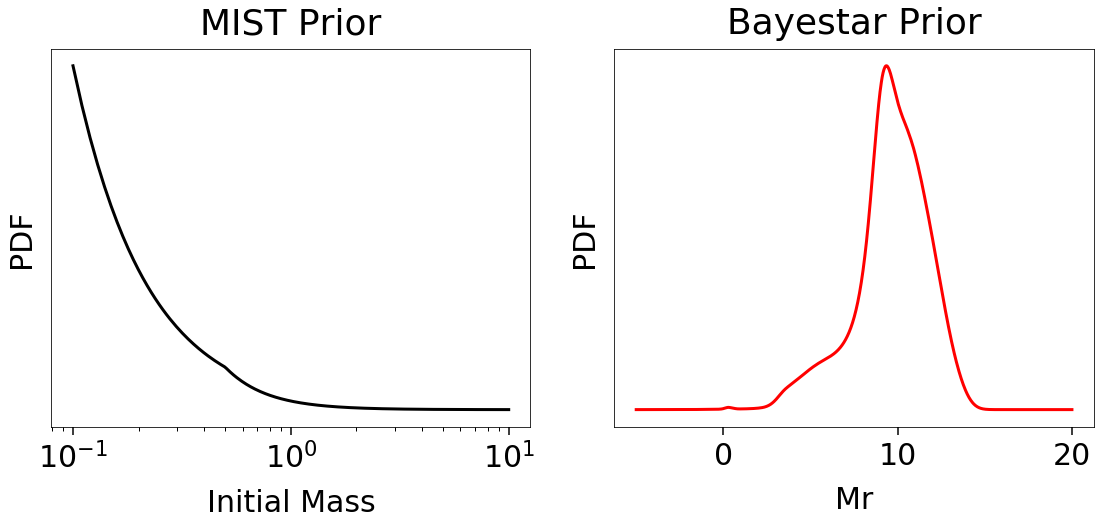

In [22]:
# IMF prior (default Kroupa)
mini = np.linspace(0.1, 10, 1000)
lnp_imf = pdf.imf_lnprior(mini)

# Mr prior
mr = np.linspace(-5., 20., 1000)
lnp_mr = pdf.ps1_MrLF_lnprior(mr)

# plot results
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.semilogx(mini, np.exp(lnp_imf), lw=3, color='black')
plt.xlabel('Initial Mass')
plt.ylabel('PDF')
plt.yticks([])
plt.title('MIST Prior')
plt.subplot(1, 2, 2)
plt.plot(mr, np.exp(lnp_mr), lw=3, color='red')
plt.xlabel('Mr')
plt.ylabel('PDF')
plt.yticks([])
plt.title('Bayestar Prior')
plt.tight_layout()

## Galactic Priors

By default, `brutus` uses a physical 3-component thin disk, thick disk, and halo model on distance, metallicity, and age. One way to understand this prior is to explore how it behaves under various assumptions of metallicity and age along a particular line of sight. In the example below, we compute the prior along a sightline that is angled upwards from the Galactic midplane and perpendicular to the direction aligned with the Galactic center.

In [48]:
import warnings

def plot_pdf(lnp, lnp_parts):
    
    # get main components
    lnp_thin, lnp_thick, lnp_halo = lnp_parts['number_density']
    ptot = np.exp(lnp)
    pthin, pthick, phalo = np.exp(lnp_thin), np.exp(lnp_thick), np.exp(lnp_halo)
    
    # get other components
    if lnp_parts.get('feh') is None and lnp_parts.get('age') is None:
        pf = 1.
    elif lnp_parts.get('feh') is not None and lnp_parts.get('age') is None:
        lnpf_thin, lnpf_thick, lnpf_halo = lnp_parts['feh']
        pfthin, pfthick, pfhalo = np.exp(lnpf_thin), np.exp(lnpf_thick), np.exp(lnpf_halo)
        pf = pfthin + pfthick + pfhalo
    elif lnp_parts.get('feh') is None and lnp_parts.get('age') is not None:
        lnpa_thin, lnpa_thick, lnpa_halo = lnp_parts['age']
        pathin, pathick, pahalo = np.exp(lnpa_thin), np.exp(lnpa_thick), np.exp(lnpa_halo)
        pf = pathin + pathick + pahalo
    else:
        lnpf_thin, lnpf_thick, lnpf_halo = lnp_parts['feh']
        lnpa_thin, lnpa_thick, lnpa_halo = lnp_parts['age']
        pfthin, pfthick, pfhalo = np.exp(lnpf_thin), np.exp(lnpf_thick), np.exp(lnpf_halo)
        pathin, pathick, pahalo = np.exp(lnpa_thin), np.exp(lnpa_thick), np.exp(lnpa_halo)
        pf = (pfthin + pfthick + pfhalo) * (pathin + pathick + pahalo)

    pthin *= pf
    pthick *= pf
    phalo *= pf    

    # plot results
    plt.fill_between(dists, ptot, color='gray', alpha=0.5, 
                     label='Total')
    plt.semilogx(dists, ptot, color='black', lw=2)
    plt.fill_between(dists, pthin, color='dodgerblue', alpha=0.5, 
                     label='Thin Disk')
    plt.semilogx(dists, pthin, color='black', lw=1)
    plt.fill_between(dists, pthick, color='limegreen', alpha=0.5,
                     label='Thick Dick')
    plt.semilogx(dists, pthick, color='black', lw=1)
    plt.fill_between(dists, phalo, color='firebrick', alpha=0.5,
                     label='Halo')
    plt.semilogx(dists, phalo, color='black', lw=1)
    plt.xlabel('Distance [kpc]')
    plt.ylabel('PDF')
    plt.yticks([])
    plt.xlim([1e-2, 1e3])
    plt.ylim([0., None])
    
def plot_galprior(l, b):
    
    coord = np.array([l, b])
    
    with warnings.catch_warnings():
        # ignore astropy warnings
        warnings.simplefilter("ignore")
    
        # number density only
        plt.subplot(5, 5, 1)
        lnp, lnp_parts = pdf.gal_lnprior(dists, coord,
                                         return_components=True)
        plot_pdf(lnp, lnp_parts)
        plt.legend()
        plt.title('Number Density Only', weight='bold', fontsize=40)

        # metallicity only
        for i, feh in enumerate(fehs):
            labels = {'feh': np.full_like(dists, feh)}
            lnp, lnp_parts = pdf.gal_lnprior(dists, coord, labels=labels,
                                             return_components=True)
            plt.subplot(5, 5, i + 2)
            plot_pdf(lnp, lnp_parts)
            plt.title('[Fe/H] = {}'.format(feh), weight='bold')

        # age only
        for i, age in enumerate(ages):
            labels = {'loga': np.full_like(dists, np.log10(age * 1e9))}
            lnp, lnp_parts = pdf.gal_lnprior(dists, coord, labels=labels,
                                             return_components=True)
            plt.subplot(5, 5, 5 * (i+1) + 1)
            plot_pdf(lnp, lnp_parts)
            plt.title('Age = {} Gyr'.format(age), weight='bold')

        # feh and age
        for i, feh in enumerate(fehs):
            for j, age in enumerate(ages):
                labels = {'feh': np.full_like(dists, feh),
                          'loga': np.full_like(dists, np.log10(age * 1e9))}
                lnp, lnp_parts = pdf.gal_lnprior(dists, coord, labels=labels,
                                             return_components=True)
                plt.subplot(5, 5, 5 * (j+1) + (i+1) + 1)
                plot_pdf(lnp, lnp_parts)
                plt.title('[Fe/H] = {}, Age = {} Gyr'.format(feh, age))

        plt.suptitle('Galactic Prior for (l, b) = ({}, {})'
                     .format(coord[0], coord[1]), 
                     y=1.04, fontsize=50)
        plt.tight_layout()

In [49]:
# distance grid
dists = np.logspace(-2, 3, 1000)

# constant metallicity and age
fehs = [-0.25, -0.75, -1.25, -1.75]
ages = [3., 6., 9., 12.]

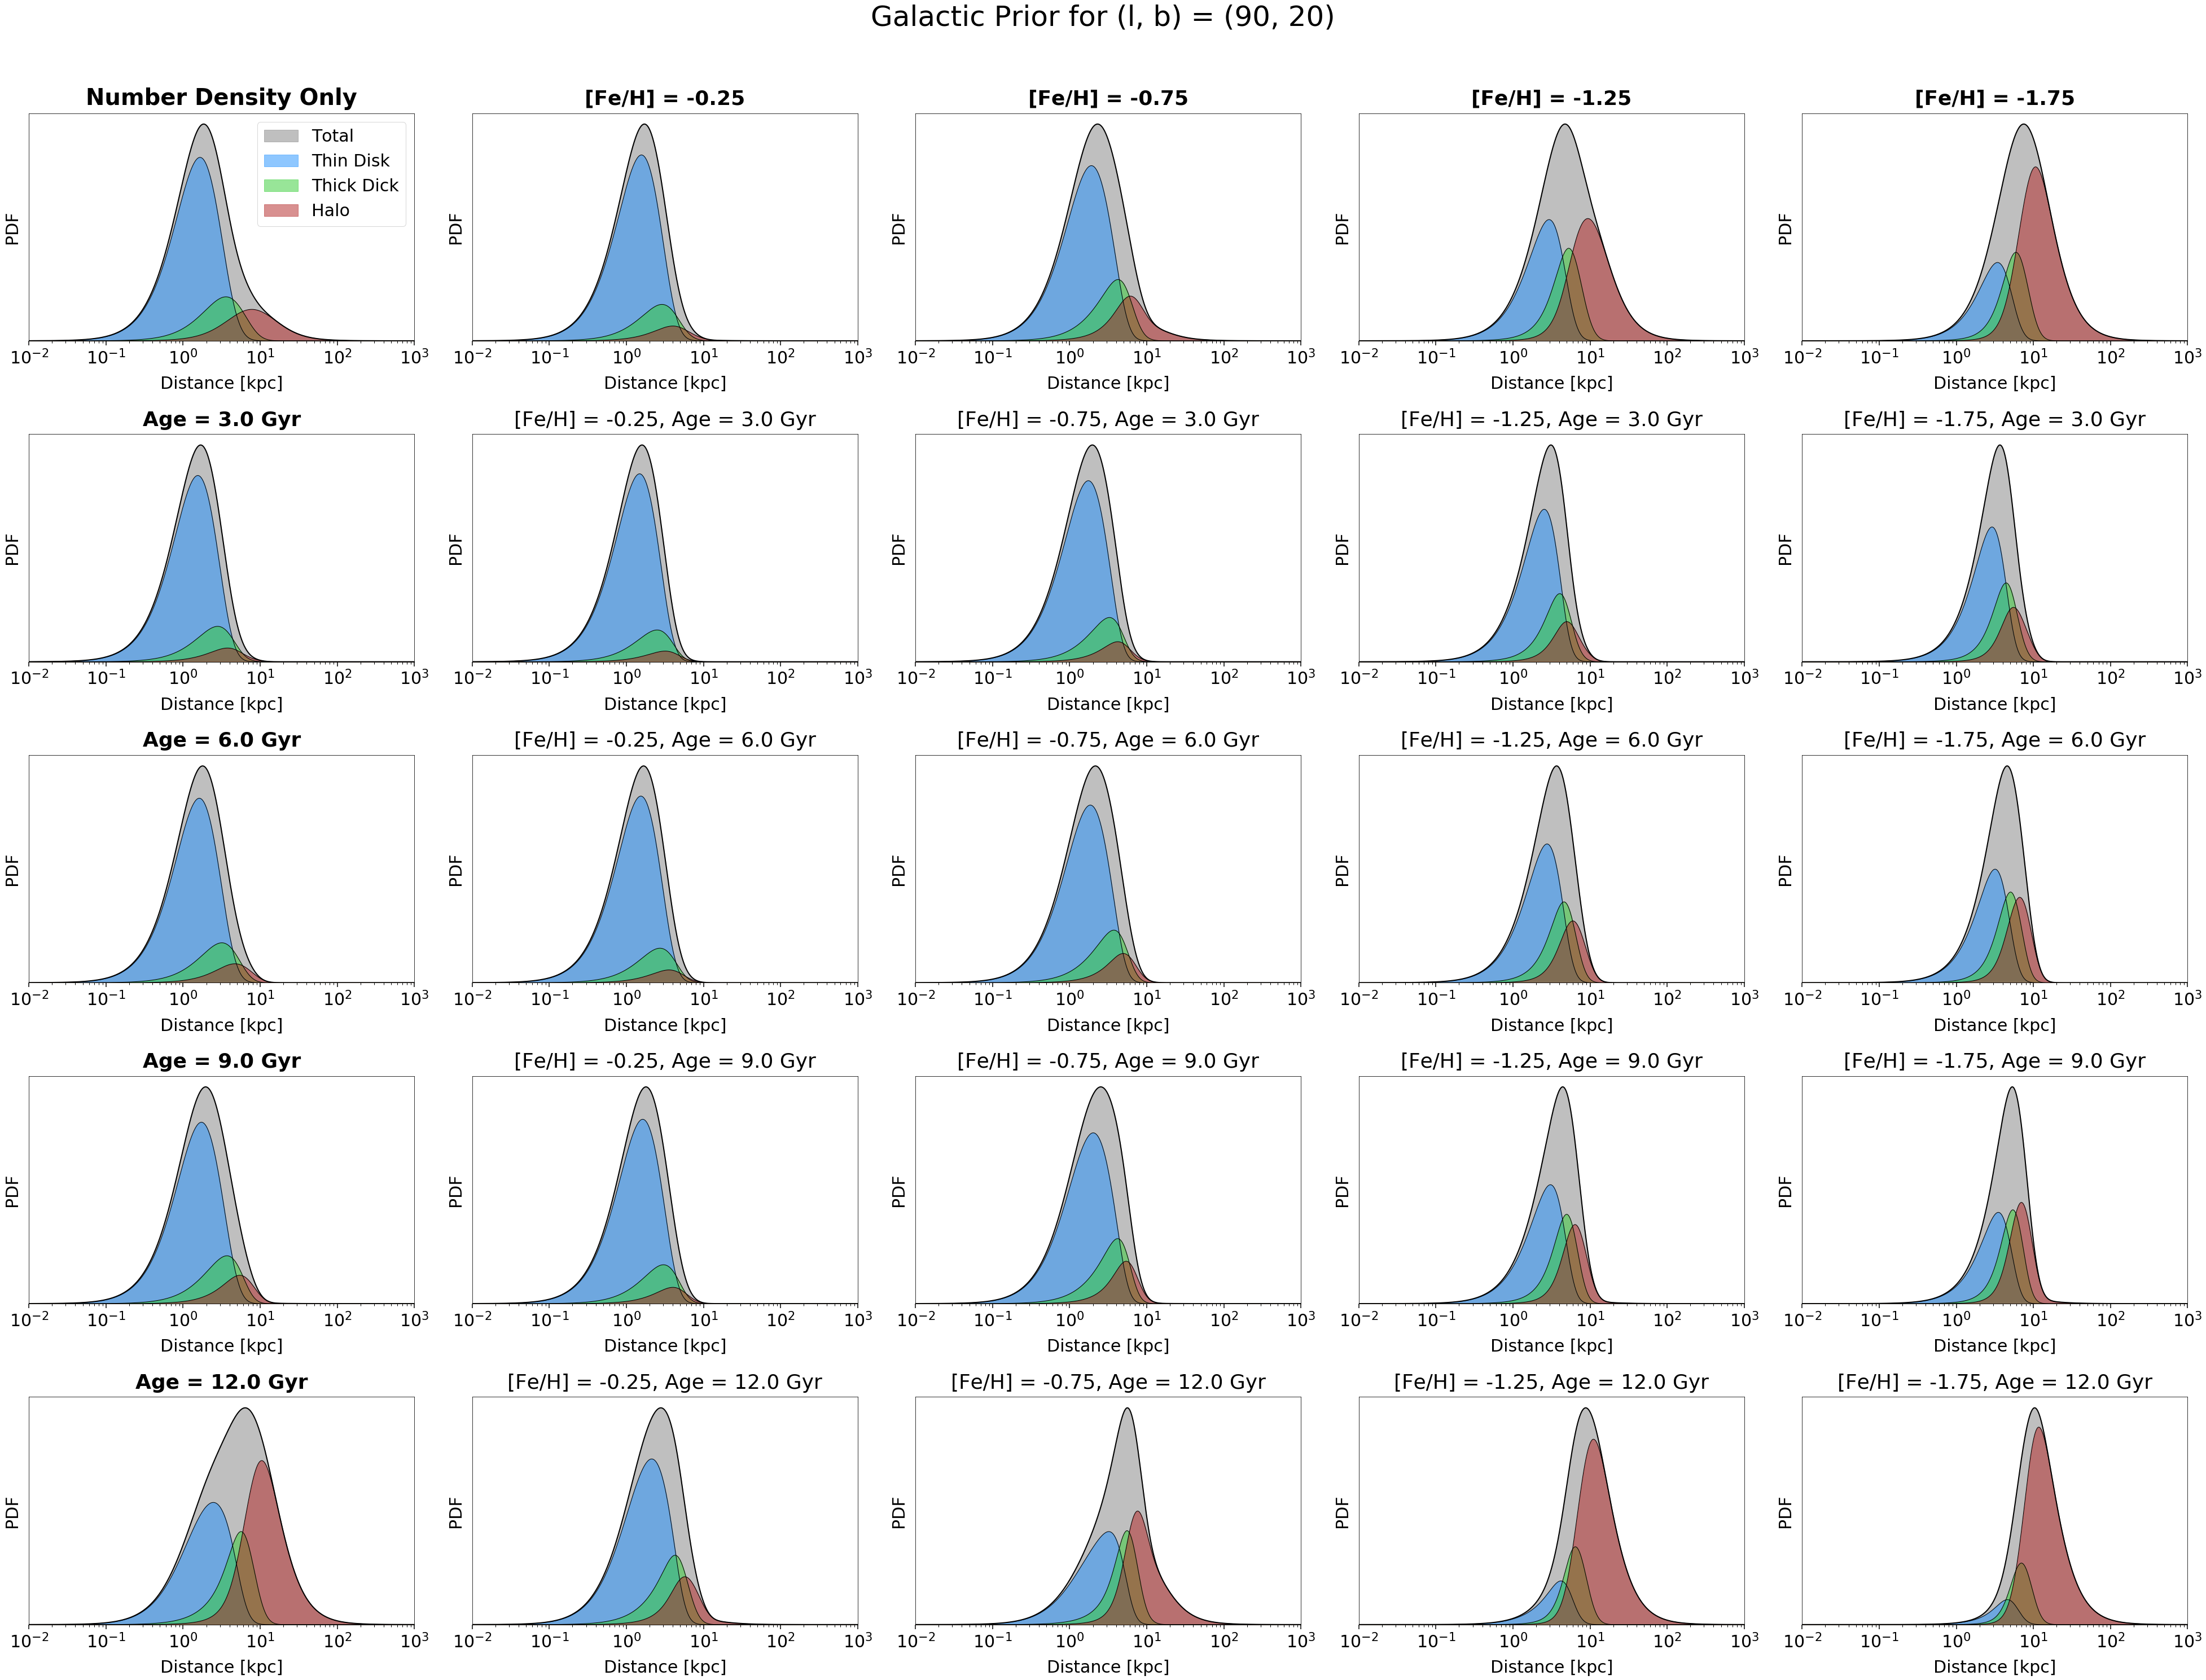

In [50]:
# Galactic coordinates
l, b = 90, 20

# plot results
plt.figure(figsize=(55, 40))
plot_galprior(l, b)

We can also consider a sightline towards the Galactic center.

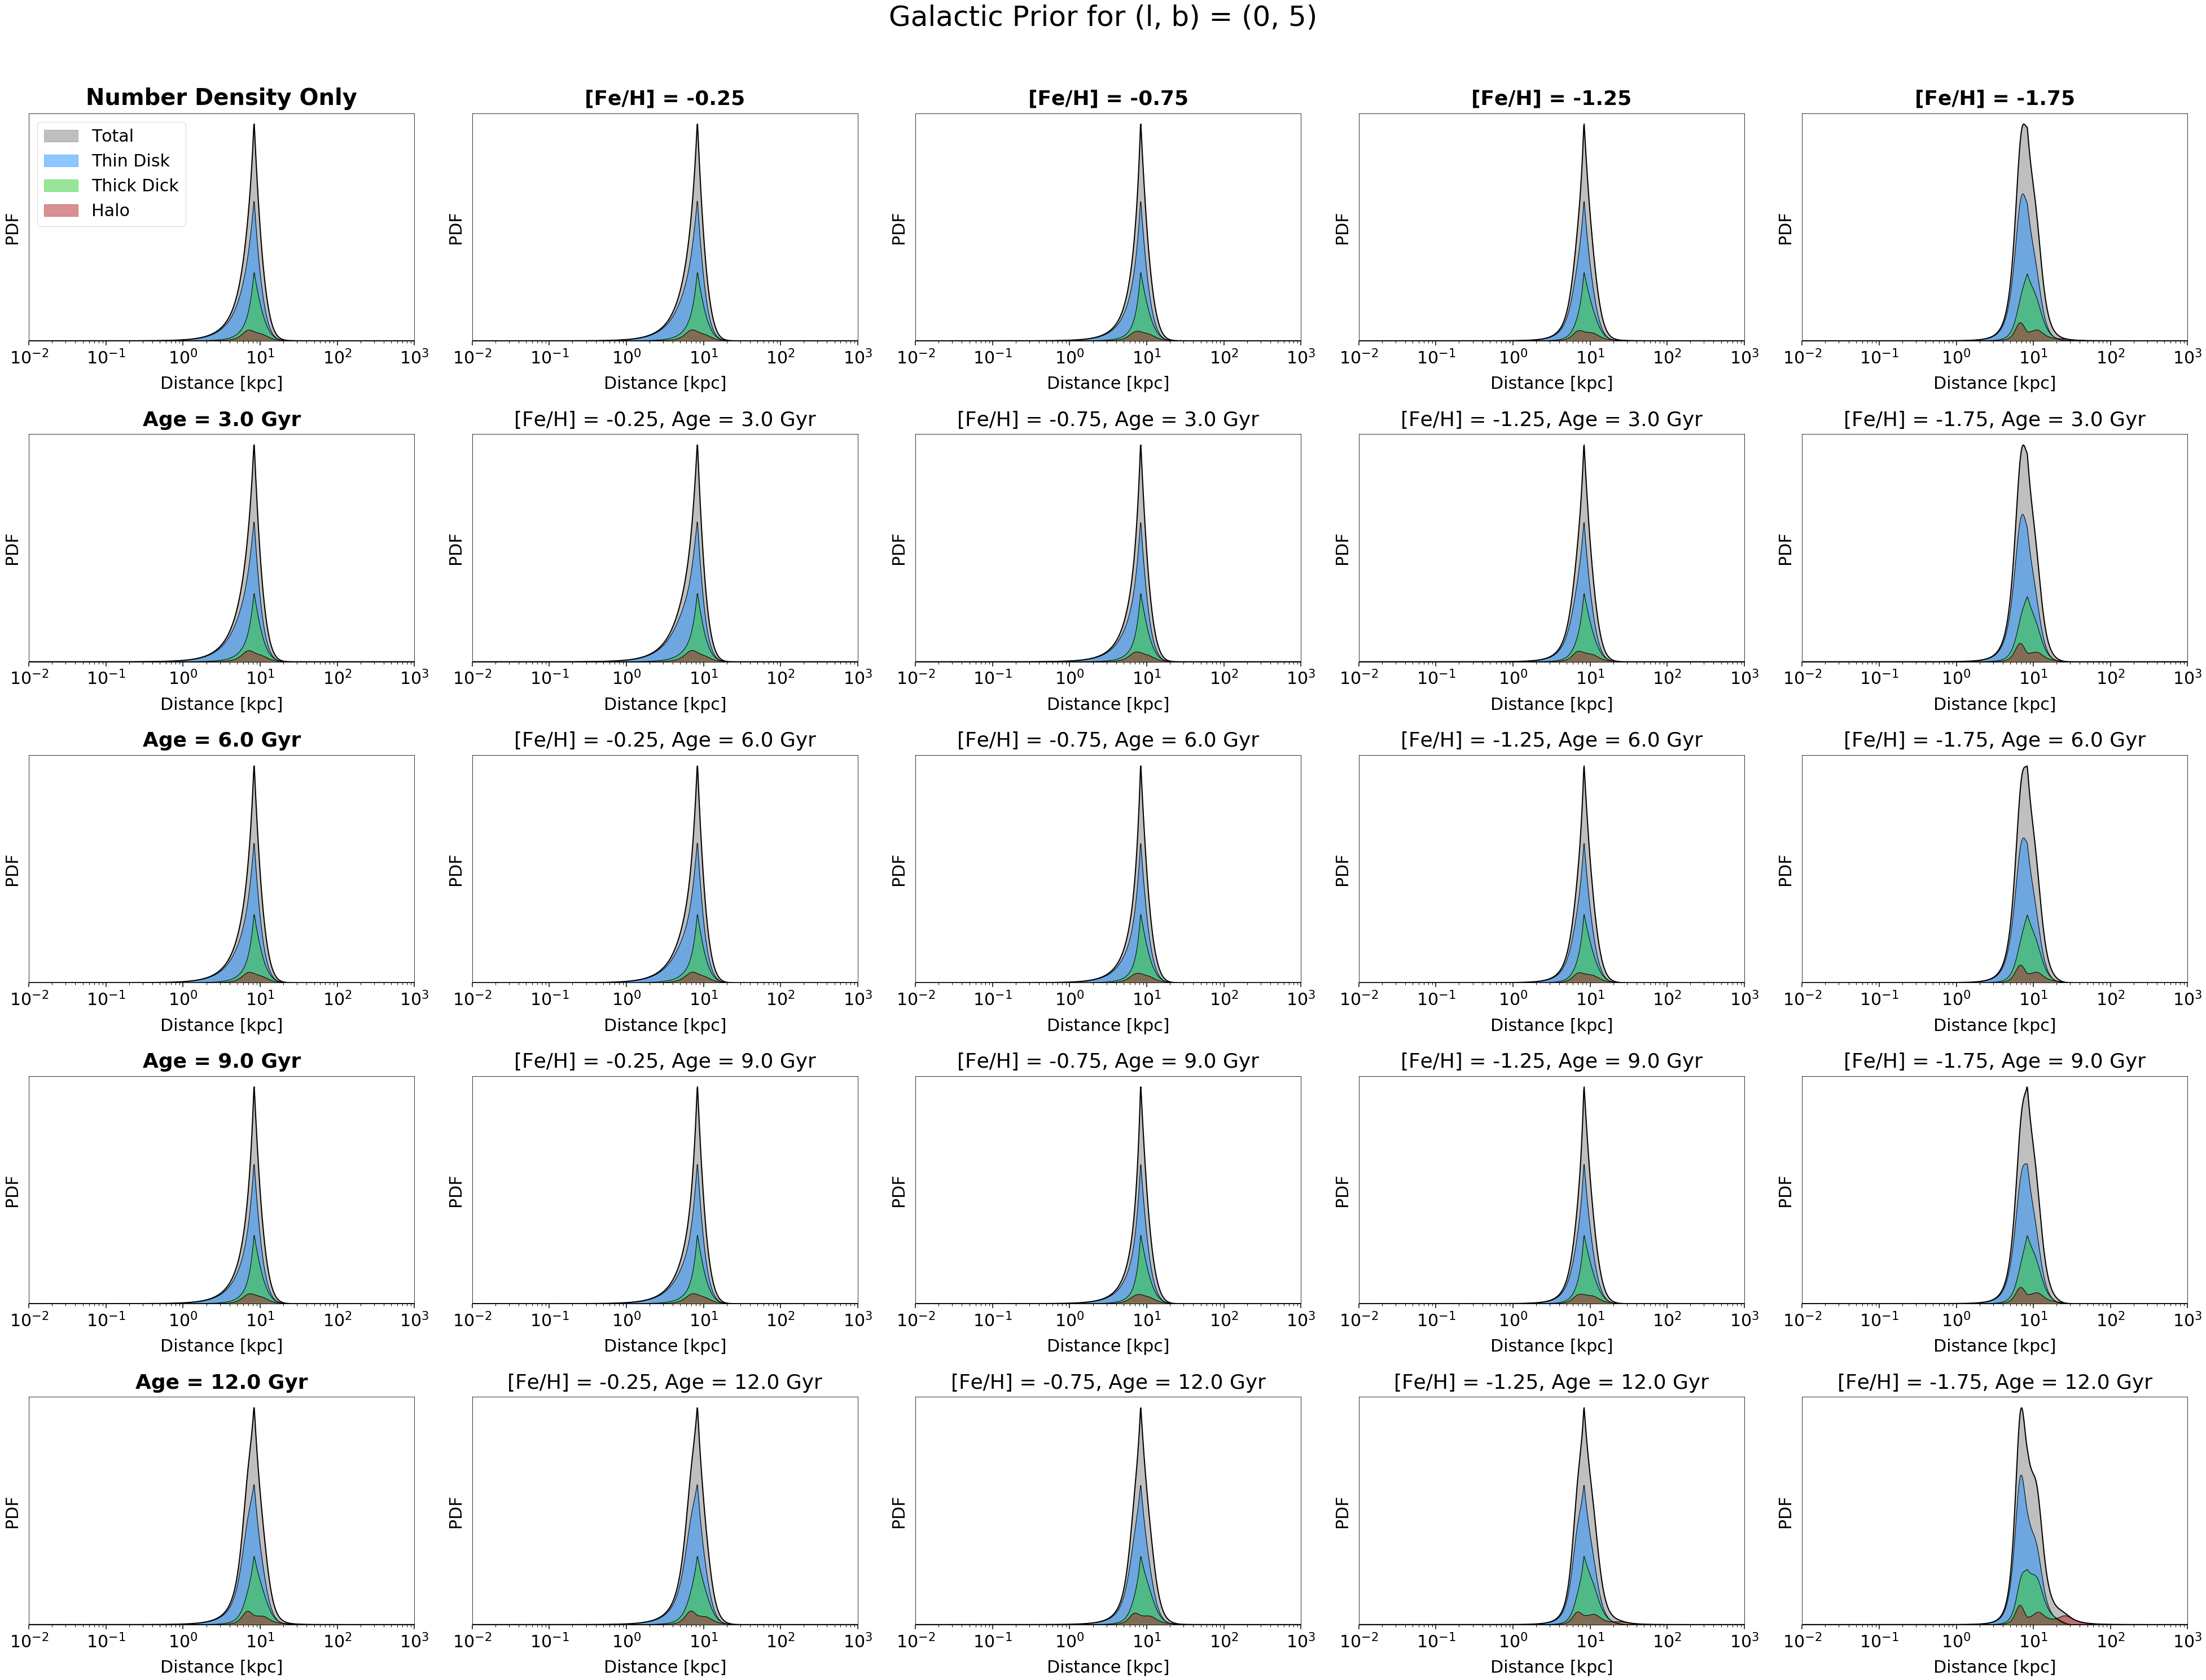

In [51]:
# Galactic coordinates
l, b = 0, 5

# plot results
plt.figure(figsize=(55, 40))
plot_galprior(l, b)

And one towards the anti-center that is angled substantially out of the plane.

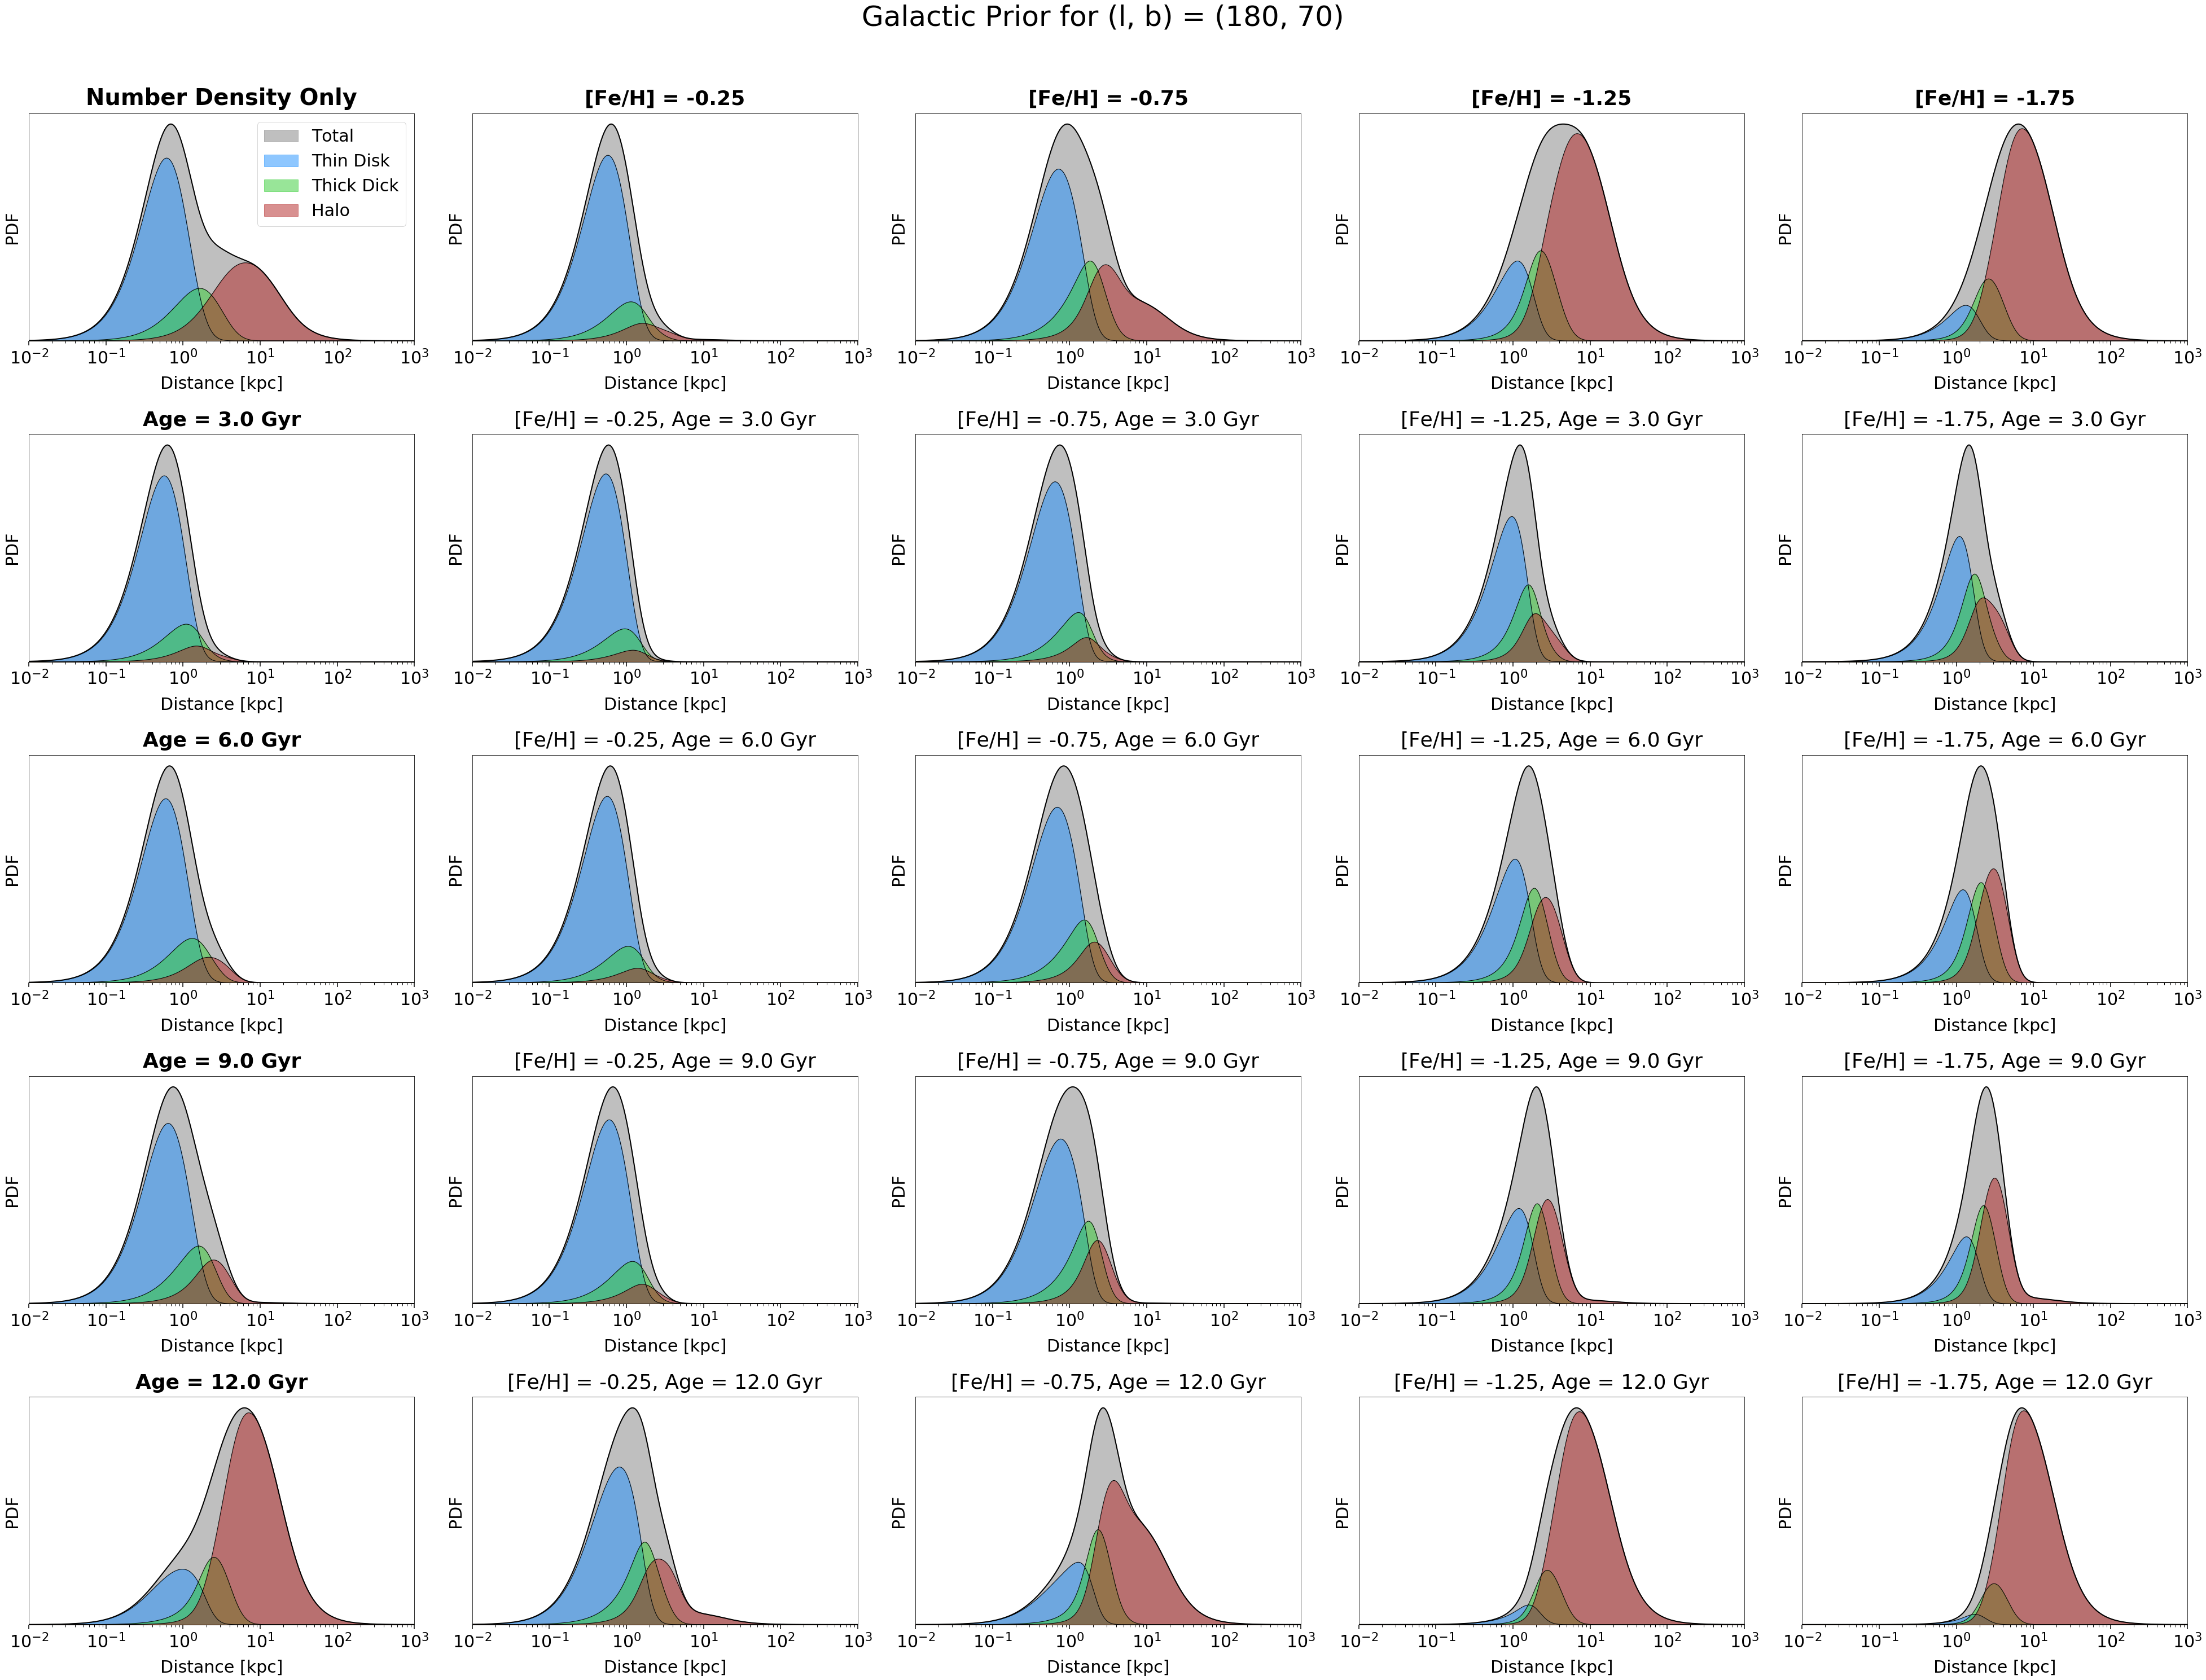

In [52]:
# Galactic coordinates
l, b = 180, 70

# plot results
plt.figure(figsize=(55, 40))
plot_galprior(l, b)

## Dust Priors

`brutus` can also impose additional 3-D priors on extinction based on the 3-D distribution of dust. The only currently available prior is based on the Green et al. (2019) (i.e. "Bayestar19") dust map, which can be accessed using the `Bayestar` class in `utils` with the relevant files (available online). This include additional uncertainties above the uncertainties directly estimated from the dust map based on comparisons with other work, which can be disabled or reduced using function arguments.

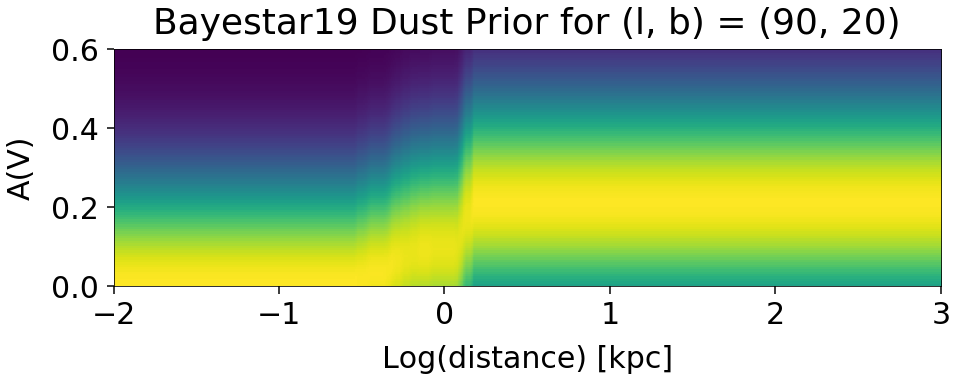

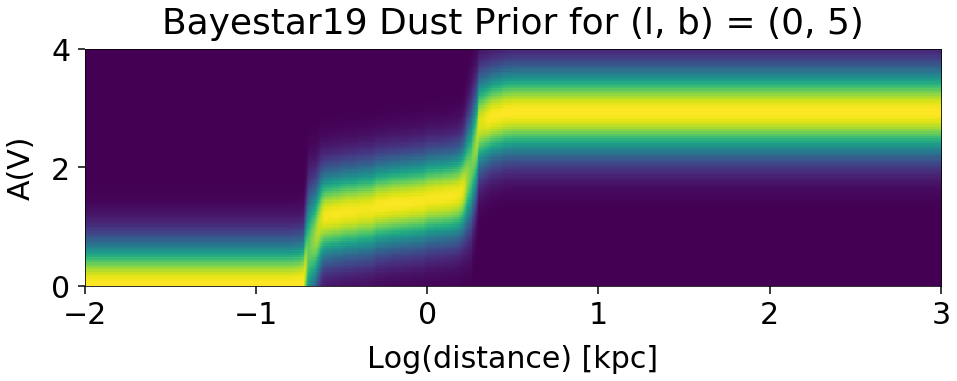

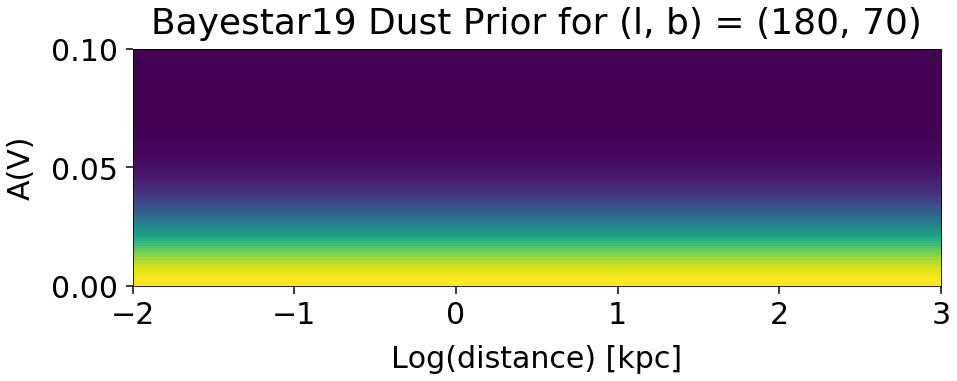

In [66]:
dustfile = '../data/DATAFILES/bayestar2019_v1.h5'  # Bayestar19 map

lnpgrid = np.zeros((len(avgrid), len(dists)))
avgrids = [np.linspace(0, 0.6, 100), np.linspace(0, 4, 100), np.linspace(0, 0.1, 100)]
coords = [[90, 20], [0, 5], [180, 70]]
scatters = [0.2, 0.5, 0.02]

for avgrid, coord, scatter in zip(avgrids, coords, scatters):
    for i, av in enumerate(avgrid):
        avs = np.full_like(dists, av)
        # sample dust prior
        lnpgrid[i] = pdf.dust_lnprior(dists, coord, avs, 
                                      dustfile=dustfile, 
                                      scatter=scatter)

    # plot results
    plt.figure(figsize=(14, 6))
    plt.imshow(np.exp(lnpgrid), origin='lower', 
               extent=[np.log10(dists.min()), np.log10(dists.max()), 
                       avgrid.min(), avgrid.max()], 
               aspect='auto')
    plt.xlabel('Log(distance) [kpc]')
    plt.ylabel('A(V)')
    plt.title('Bayestar19 Dust Prior for (l, b) = ({}, {})'
              .format(coord[0], coord[1]))
    plt.tight_layout()